# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])[:,None]
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])[:,None]
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float", shape=[1])
Y = tf.placeholder("float", shape=[1])

# Set model weights


In [5]:
# define a linear function
def linear(x, output_features, return_params=False):
    x_flat = tf.reshape(x,[-1])
    input_features=int(x_flat.get_shape()[0])
    W = tf.Variable(tf.random_uniform(shape=[input_features, output_features], name="weight"))
    b = tf.Variable(tf.random_uniform(shape=[output_features], name="bias"))
    pred = tf.add(tf.multiply(X, W), b)
    return pred, W, b
#pred = linear(X, 1)
pred, W, b = linear(X,1, return_params=True)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.084144958 W= [[ 0.29706264]] b= [ 0.45997798]
Epoch: 0100 cost= 0.083315318 W= [[ 0.29423931]] b= [ 0.48028821]
Epoch: 0150 cost= 0.082581671 W= [[ 0.29158422]] b= [ 0.49938944]
Epoch: 0200 cost= 0.081932946 W= [[ 0.28908685]] b= [ 0.51735485]
Epoch: 0250 cost= 0.081359257 W= [[ 0.28673807]] b= [ 0.53425193]
Epoch: 0300 cost= 0.080851975 W= [[ 0.28452882]] b= [ 0.55014467]
Epoch: 0350 cost= 0.080403423 W= [[ 0.28245097]] b= [ 0.56509262]
Epoch: 0400 cost= 0.080006797 W= [[ 0.28049672]] b= [ 0.57915175]
Epoch: 0450 cost= 0.079656088 W= [[ 0.27865848]] b= [ 0.59237564]
Epoch: 0500 cost= 0.079345997 W= [[ 0.27692959]] b= [ 0.60481328]
Epoch: 0550 cost= 0.079071880 W= [[ 0.27530372]] b= [ 0.61650962]
Epoch: 0600 cost= 0.078829562 W= [[ 0.2737748]] b= [ 0.62750864]
Epoch: 0650 cost= 0.078615366 W= [[ 0.27233675]] b= [ 0.6378535]
Epoch: 0700 cost= 0.078425962 W= [[ 0.27098426]] b= [ 0.64758337]
Epoch: 0750 cost= 0.078258574 W= [[ 0.26971221]] b= [ 0.65673465]
Epoch: 0800 

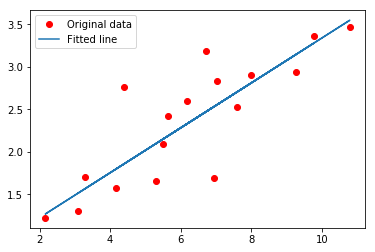

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c=0
            for (x, y) in zip(train_X, train_Y):
                c+= sess.run(cost, feed_dict={X: x, Y:y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [9]:
# Regression result